# ANALYZING GOOGLE APPS STORE DATASET IN  TERMS OF APP DOWNLOAD AND RATING


# IMPORT LIBRARIES

In [1]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
#import dataset of Apple Store
ds=pd.read_csv(r"C:\Users\Rehan\OneDrive\Desktop\Diwali Sales Data.csv",encoding='ISO-8859-1')
ds

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [3]:
ds.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
ds.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


# DATA CLEANING

In [5]:
ds.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [6]:
ds.shape

(11251, 15)

In [7]:
#lets remove unwanted columns(Status,unnamed1)
ds=ds.drop(['Status','unnamed1'],axis=1)

In [8]:
#remove NAN values of Amount Attribute
ds.dropna(subset=["Amount"],inplace=True)

In [9]:
ds.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [11]:
ds.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [12]:
ds.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
ds.shape

(11239, 13)

# DATA VISUALIZATION

In [14]:
ds.corr()

,User_ID,Age,Marital_Status,Orders,Amount
User_ID,1.000000,0.022338,0.004345,-0.016022,-0.011997
Age,0.022338,1.000000,-0.012344,0.008090,0.030941
Marital_Status,0.004345,-0.012344,1.000000,-0.003487,-0.017493
Orders,-0.016022,0.008090,-0.003487,1.000000,-0.013183
Amount,-0.011997,0.030941,-0.017493,-0.013183,1.000000


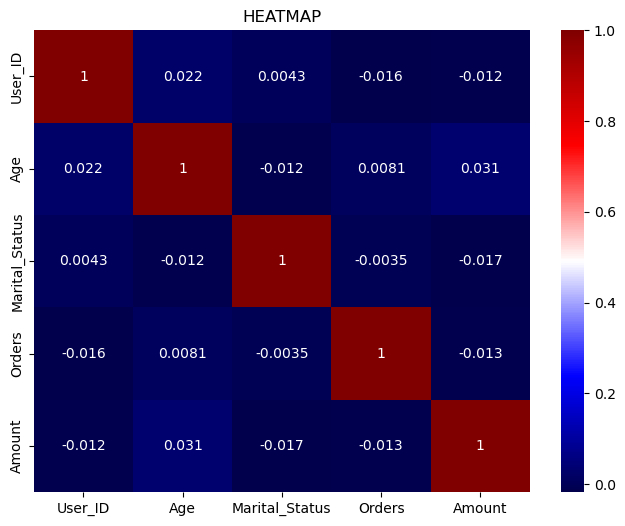

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(ds.corr(),cmap='seismic',annot=True)
plt.title('HEATMAP')
plt.show()

In [16]:
ds['State'].value_counts()

Uttar Pradesh       1944
Maharashtra         1525
Karnataka           1304
Delhi               1104
Madhya Pradesh       921
Andhra Pradesh       811
Himachal Pradesh     608
Kerala               453
Haryana              452
Bihar                434
Gujarat              427
Jharkhand            380
Uttarakhand          320
Rajasthan            231
Punjab               200
Telangana            125
Name: State, dtype: int64

In [17]:
ds['State'].value_counts()[0:10]

Uttar Pradesh       1944
Maharashtra         1525
Karnataka           1304
Delhi               1104
Madhya Pradesh       921
Andhra Pradesh       811
Himachal Pradesh     608
Kerala               453
Haryana              452
Bihar                434
Name: State, dtype: int64

In [18]:
ds['State'].value_counts()[0:10].keys()

Index(['Uttar Pradesh', 'Maharashtra', 'Karnataka', 'Delhi', 'Madhya Pradesh',
       'Andhra Pradesh', 'Himachal Pradesh', 'Kerala', 'Haryana', 'Bihar'],
      dtype='object')

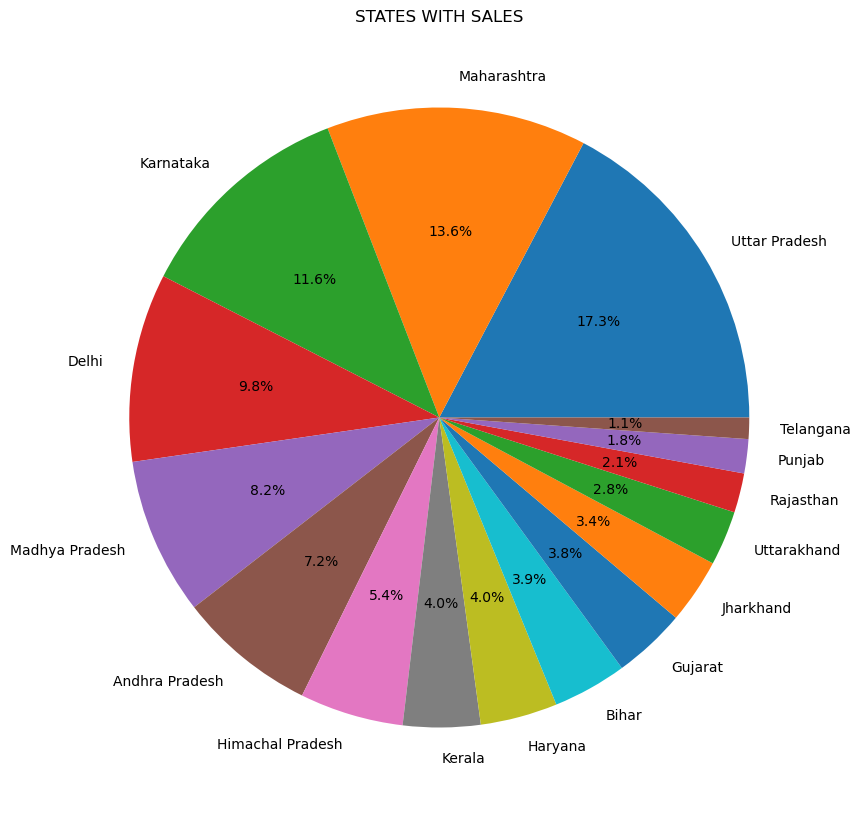

In [264]:
#plotting pie
plt.figure(figsize=(10,12))
plt.pie(list(ds['State'].value_counts()),labels=list(ds['State'].value_counts().keys()),autopct='%1.1f%%')
plt.title('STATES WITH SALES')
plt.show()

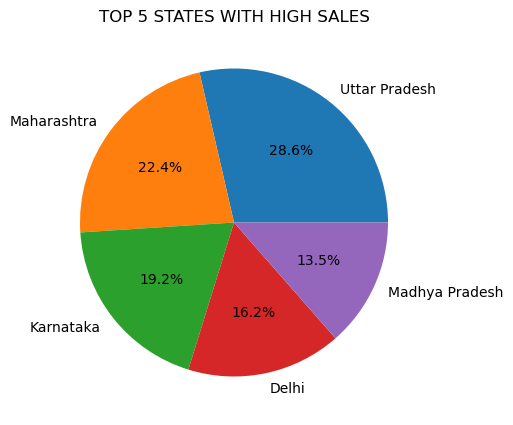

UTTAR PRADESH HAS HIGHEST SALES


In [265]:
#plotting pie
plt.figure(figsize=(5,5))
plt.pie(list(ds['State'].value_counts()[0:5]),labels=list(ds['State'].value_counts().keys()[0:5]),autopct='%1.1f%%')
plt.title('TOP 5 STATES WITH HIGH SALES')
plt.show()
print('UTTAR PRADESH HAS HIGHEST SALES')

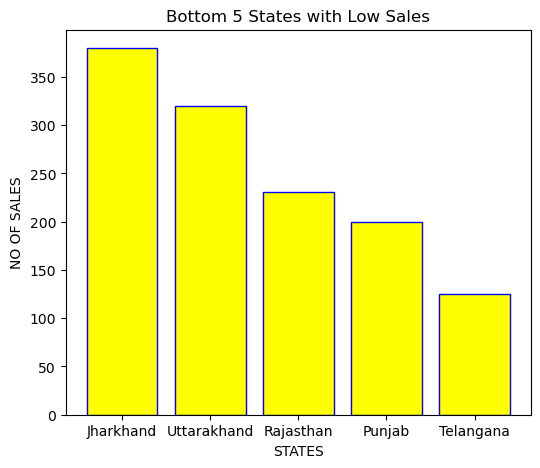

TELANGANA HAS LOWEST SALES


In [266]:
plt.figure(figsize=(6,5))
plt.bar(list(ds['State'].value_counts()[11:16].keys()),ds['State'].value_counts()[11:16],color='yellow',edgecolor='blue')
plt.title('Bottom 5 States with Low Sales')
plt.xlabel('STATES')
plt.ylabel('NO OF SALES')
plt.show()
print('TELANGANA HAS LOWEST SALES')

In [23]:
ds['Zone'].value_counts()

Central     4289
Southern    2693
Western     1952
Northern    1491
Eastern      814
Name: Zone, dtype: int64

In [24]:
ds['Zone'].value_counts().keys()

Index(['Central', 'Southern', 'Western', 'Northern', 'Eastern'], dtype='object')

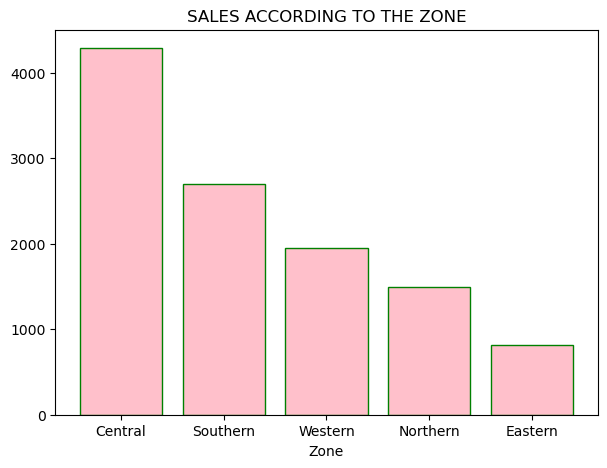

CENTRAL ZONE IS THE HIGHEST PURCHASER OF PRODUCT


In [267]:
plt.figure(figsize=(7,5))
plt.bar(list(ds['Zone'].value_counts().keys()),ds['Zone'].value_counts(),color='Pink',edgecolor='green')
plt.xlabel('Zone')
plt.title('SALES ACCORDING TO THE ZONE')
plt.show()
print('CENTRAL ZONE IS THE HIGHEST PURCHASER OF PRODUCT')

In [27]:
ds['Occupation'].value_counts()

IT Sector          1583
Healthcare         1408
Aviation           1310
Banking            1137
Govt                854
Hospitality         703
Media               637
Automobile          565
Chemical            541
Lawyer              531
Retail              501
Food Processing     423
Construction        414
Textile             349
Agriculture         283
Name: Occupation, dtype: int64

In [28]:
ds['Occupation'].value_counts().keys()

Index(['IT Sector', 'Healthcare', 'Aviation', 'Banking', 'Govt', 'Hospitality',
       'Media', 'Automobile', 'Chemical', 'Lawyer', 'Retail',
       'Food Processing', 'Construction', 'Textile', 'Agriculture'],
      dtype='object')

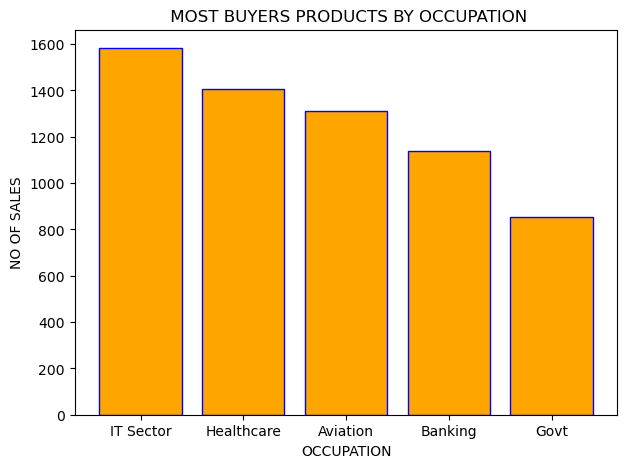

In [268]:
plt.figure(figsize=(7,5))
plt.bar(list(ds["Occupation"].value_counts()[0:5].keys()),ds['Occupation'].value_counts()[0:5],color='orange',edgecolor='blue')
plt.title(' MOST BUYERS PRODUCTS BY OCCUPATION')
plt.xlabel('OCCUPATION')
plt.ylabel('NO OF SALES')
plt.show()

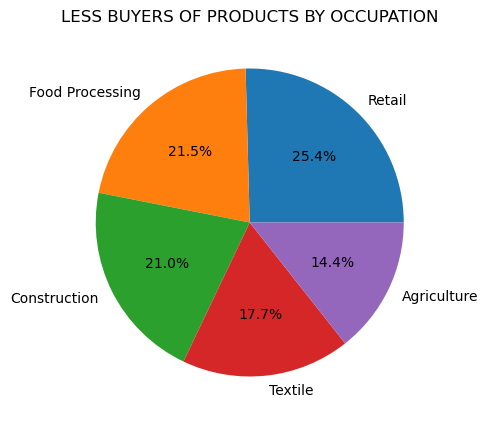

In [269]:
plt.figure(figsize=(8,5))
plt.pie(list(ds["Occupation"].value_counts()[10:15]),labels=list(ds['Occupation'].value_counts().keys()[10:15]),autopct='%1.1f%%')
plt.title('LESS BUYERS OF PRODUCTS BY OCCUPATION')
plt.show()

In [32]:
ds['Gender'].value_counts()

F    7832
M    3407
Name: Gender, dtype: int64

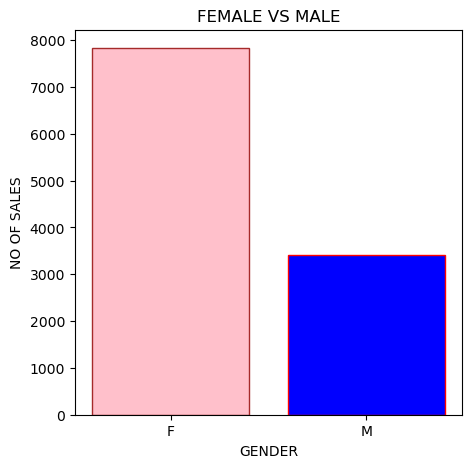

FEMALE ARE THE MOST BUYERS OF PRODUCTS 


In [270]:
plt.figure(figsize=(5,5))
plt.bar(list(ds['Gender'].value_counts().keys()),ds['Gender'].value_counts(),color=['pink','blue'],edgecolor=['brown','red'])
plt.xlabel('GENDER')
plt.ylabel('NO OF SALES')
plt.title('FEMALE VS MALE')
plt.show()
print('FEMALE ARE THE MOST BUYERS OF PRODUCTS ')

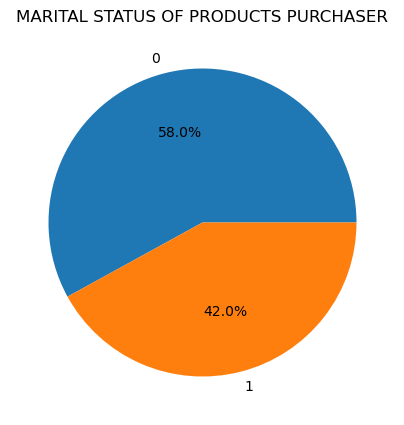

UNMARRIED PEOPLE ARE MOST BUYERS OF PRODUCTS 


In [274]:
plt.figure(figsize=(5,5))
plt.pie(list(ds['Marital_Status'].value_counts()),labels=list(ds['Marital_Status'].value_counts().keys()),autopct='%1.1f%%')
plt.title('MARITAL STATUS OF PRODUCTS PURCHASER')
plt.show()
print('UNMARRIED PEOPLE ARE MOST BUYERS OF PRODUCTS ')

In [120]:
ds['State'].value_counts()

Uttar Pradesh       1944
Maharashtra         1525
Karnataka           1304
Delhi               1104
Madhya Pradesh       921
Andhra Pradesh       811
Himachal Pradesh     608
Kerala               453
Haryana              452
Bihar                434
Gujarat              427
Jharkhand            380
Uttarakhand          320
Rajasthan            231
Punjab               200
Telangana            125
Name: State, dtype: int64

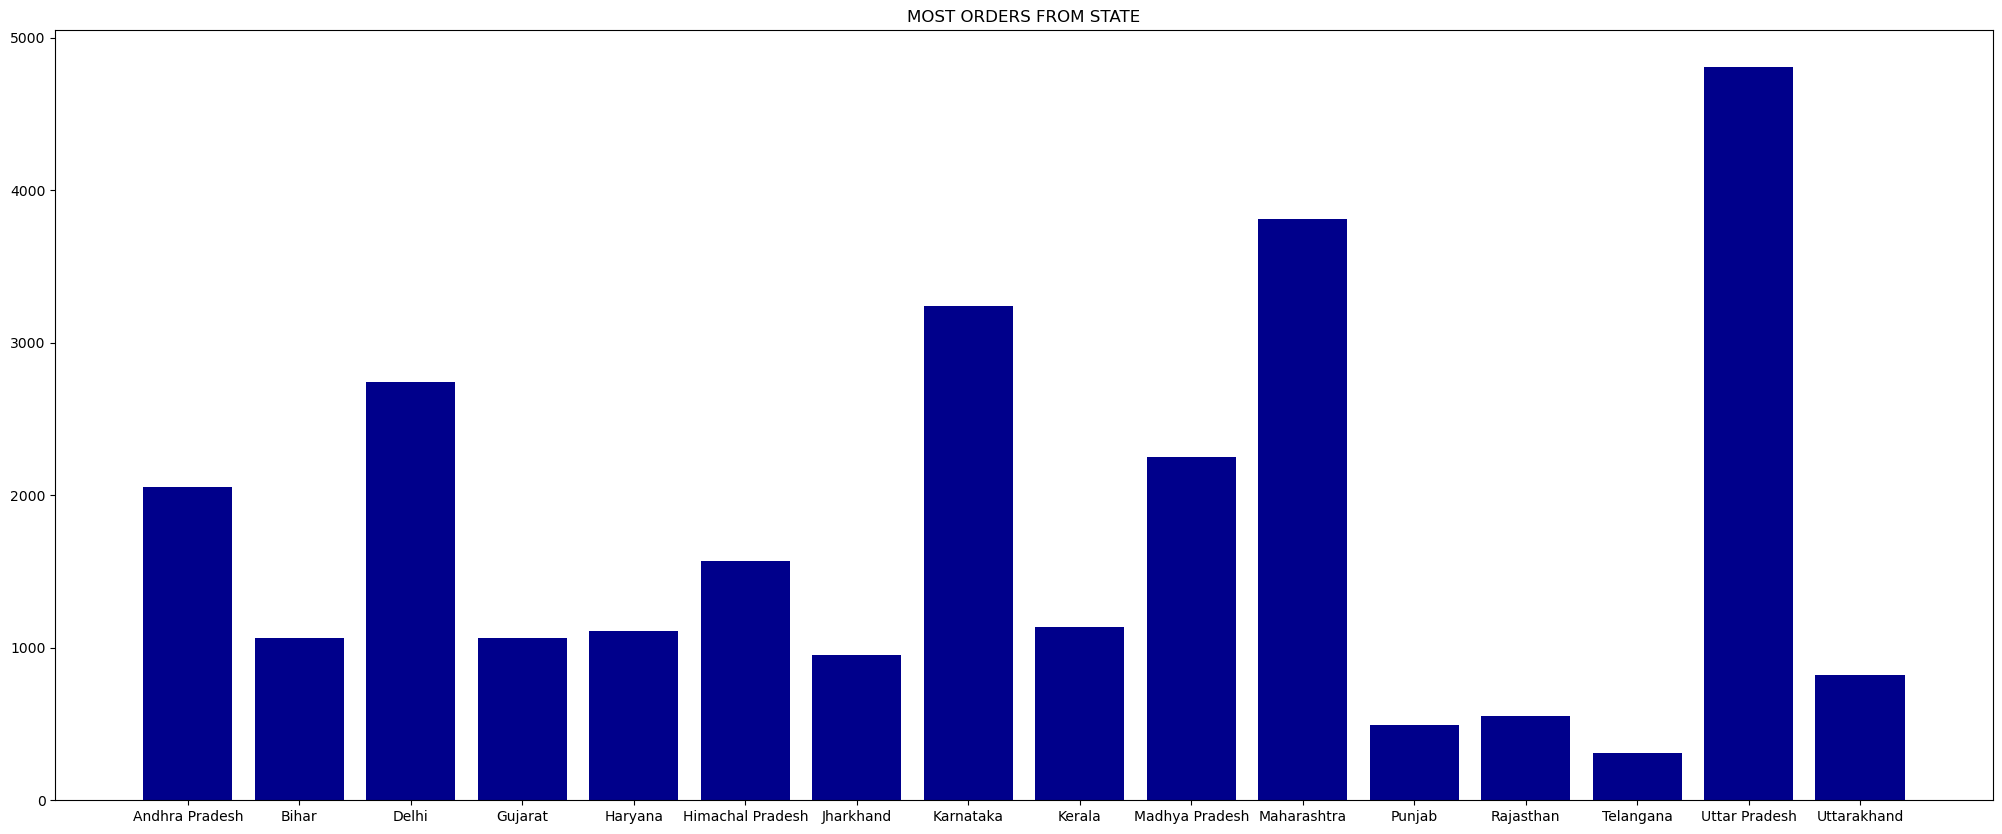

PRODUCTS ARE MOSTLY ORDERS FROM UTTAR PRADESH , MAHARASHTRA , KARNATAKA


In [273]:
orders_by_state = ds.groupby('State')['Orders'].sum().reset_index()
plt.figure(figsize=(25,10))
plt.bar(orders_by_state['State'],orders_by_state['Orders'],color='darkblue')
plt.title('MOST ORDERS FROM STATE')
plt.show()
print("PRODUCTS ARE MOSTLY ORDERS FROM UTTAR PRADESH , MAHARASHTRA , KARNATAKA")

In [122]:
ds['Occupation'].value_counts()

IT Sector          1583
Healthcare         1408
Aviation           1310
Banking            1137
Govt                854
Hospitality         703
Media               637
Automobile          565
Chemical            541
Lawyer              531
Retail              501
Food Processing     423
Construction        414
Textile             349
Agriculture         283
Name: Occupation, dtype: int64

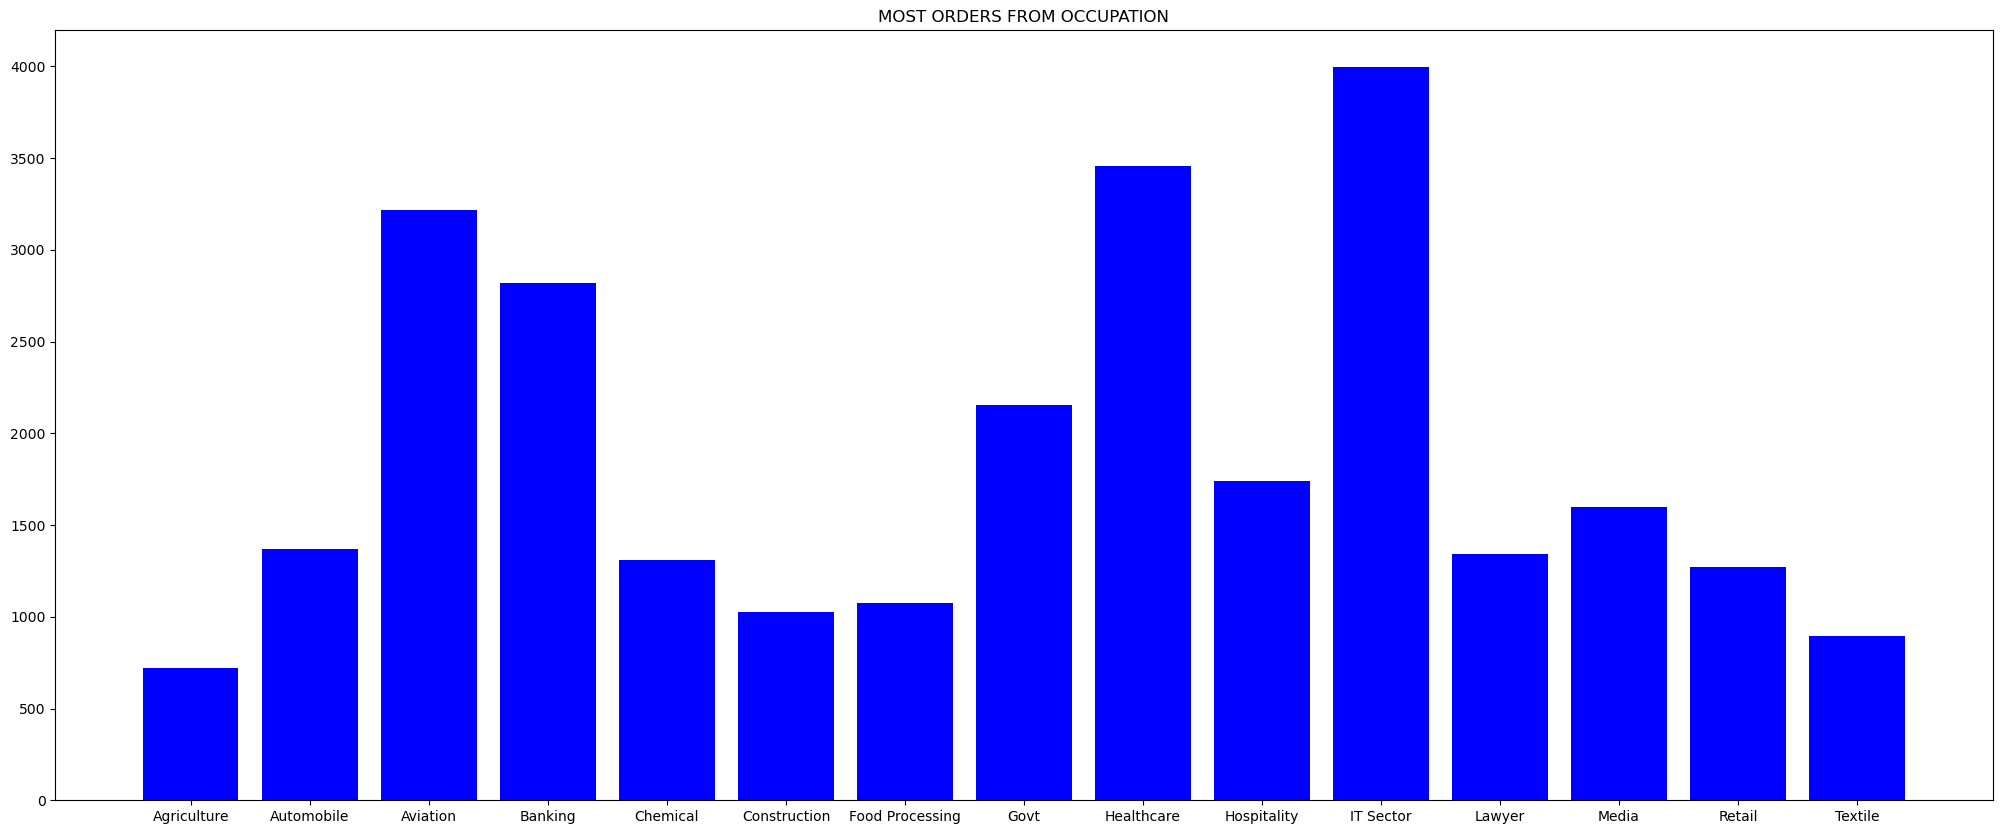

PRODUCTS ARE MOSTLY ORDERS FROM IT SECTOR , HEALTHCARE , AVIATION,BANKING


In [272]:
orders_by_occupation = ds.groupby('Occupation')['Orders'].sum().reset_index()
plt.figure(figsize=(25,10))
plt.bar(orders_by_occupation['Occupation'],orders_by_occupation['Orders'],color='blue')
plt.title('MOST ORDERS FROM OCCUPATION')
plt.show()
print("PRODUCTS ARE MOSTLY ORDERS FROM IT SECTOR , HEALTHCARE , AVIATION,BANKING")

In [37]:
ds['Age Group'].value_counts().keys()

Index(['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17'], dtype='object')

In [124]:
ds['Age Group'].value_counts()

26-35    4541
36-45    2283
18-25    1879
46-50     983
51-55     830
55+       427
0-17      296
Name: Age Group, dtype: int64

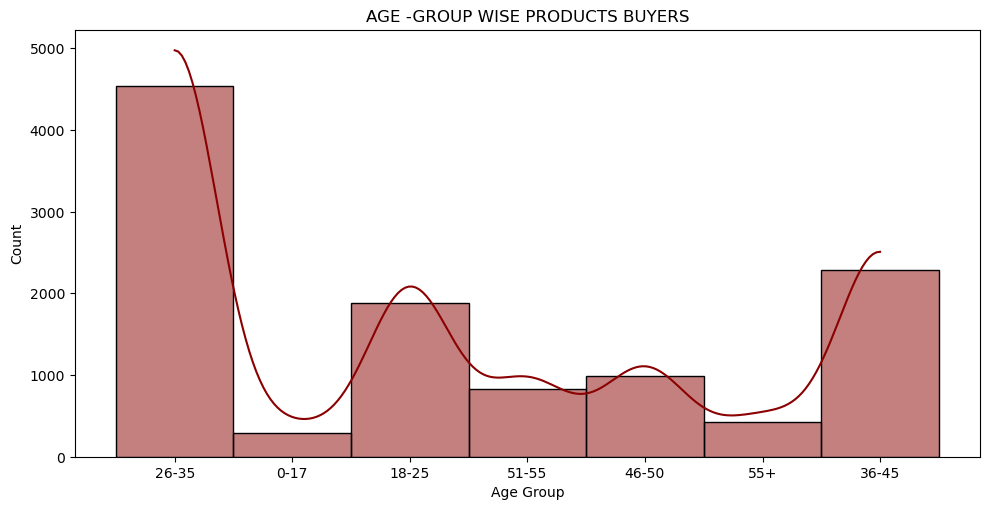

MOST BUYERS ARE FROM 26-35 AGE-GROUP


In [275]:
plt.figure(figsize=(10,5))
sns.histplot(ds['Age Group'],bins=15,kde=True,color='DARKRED')
plt.tight_layout()
plt.title('AGE -GROUP WISE PRODUCTS BUYERS')
plt.show()
print('MOST BUYERS ARE FROM 26-35 AGE-GROUP')

In [39]:
ds['Product_Category'].value_counts()

Clothing & Apparel       2655
Food                     2490
Electronics & Gadgets    2087
Footwear & Shoes         1059
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 352
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Auto                       97
Decor                      96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: Product_Category, dtype: int64

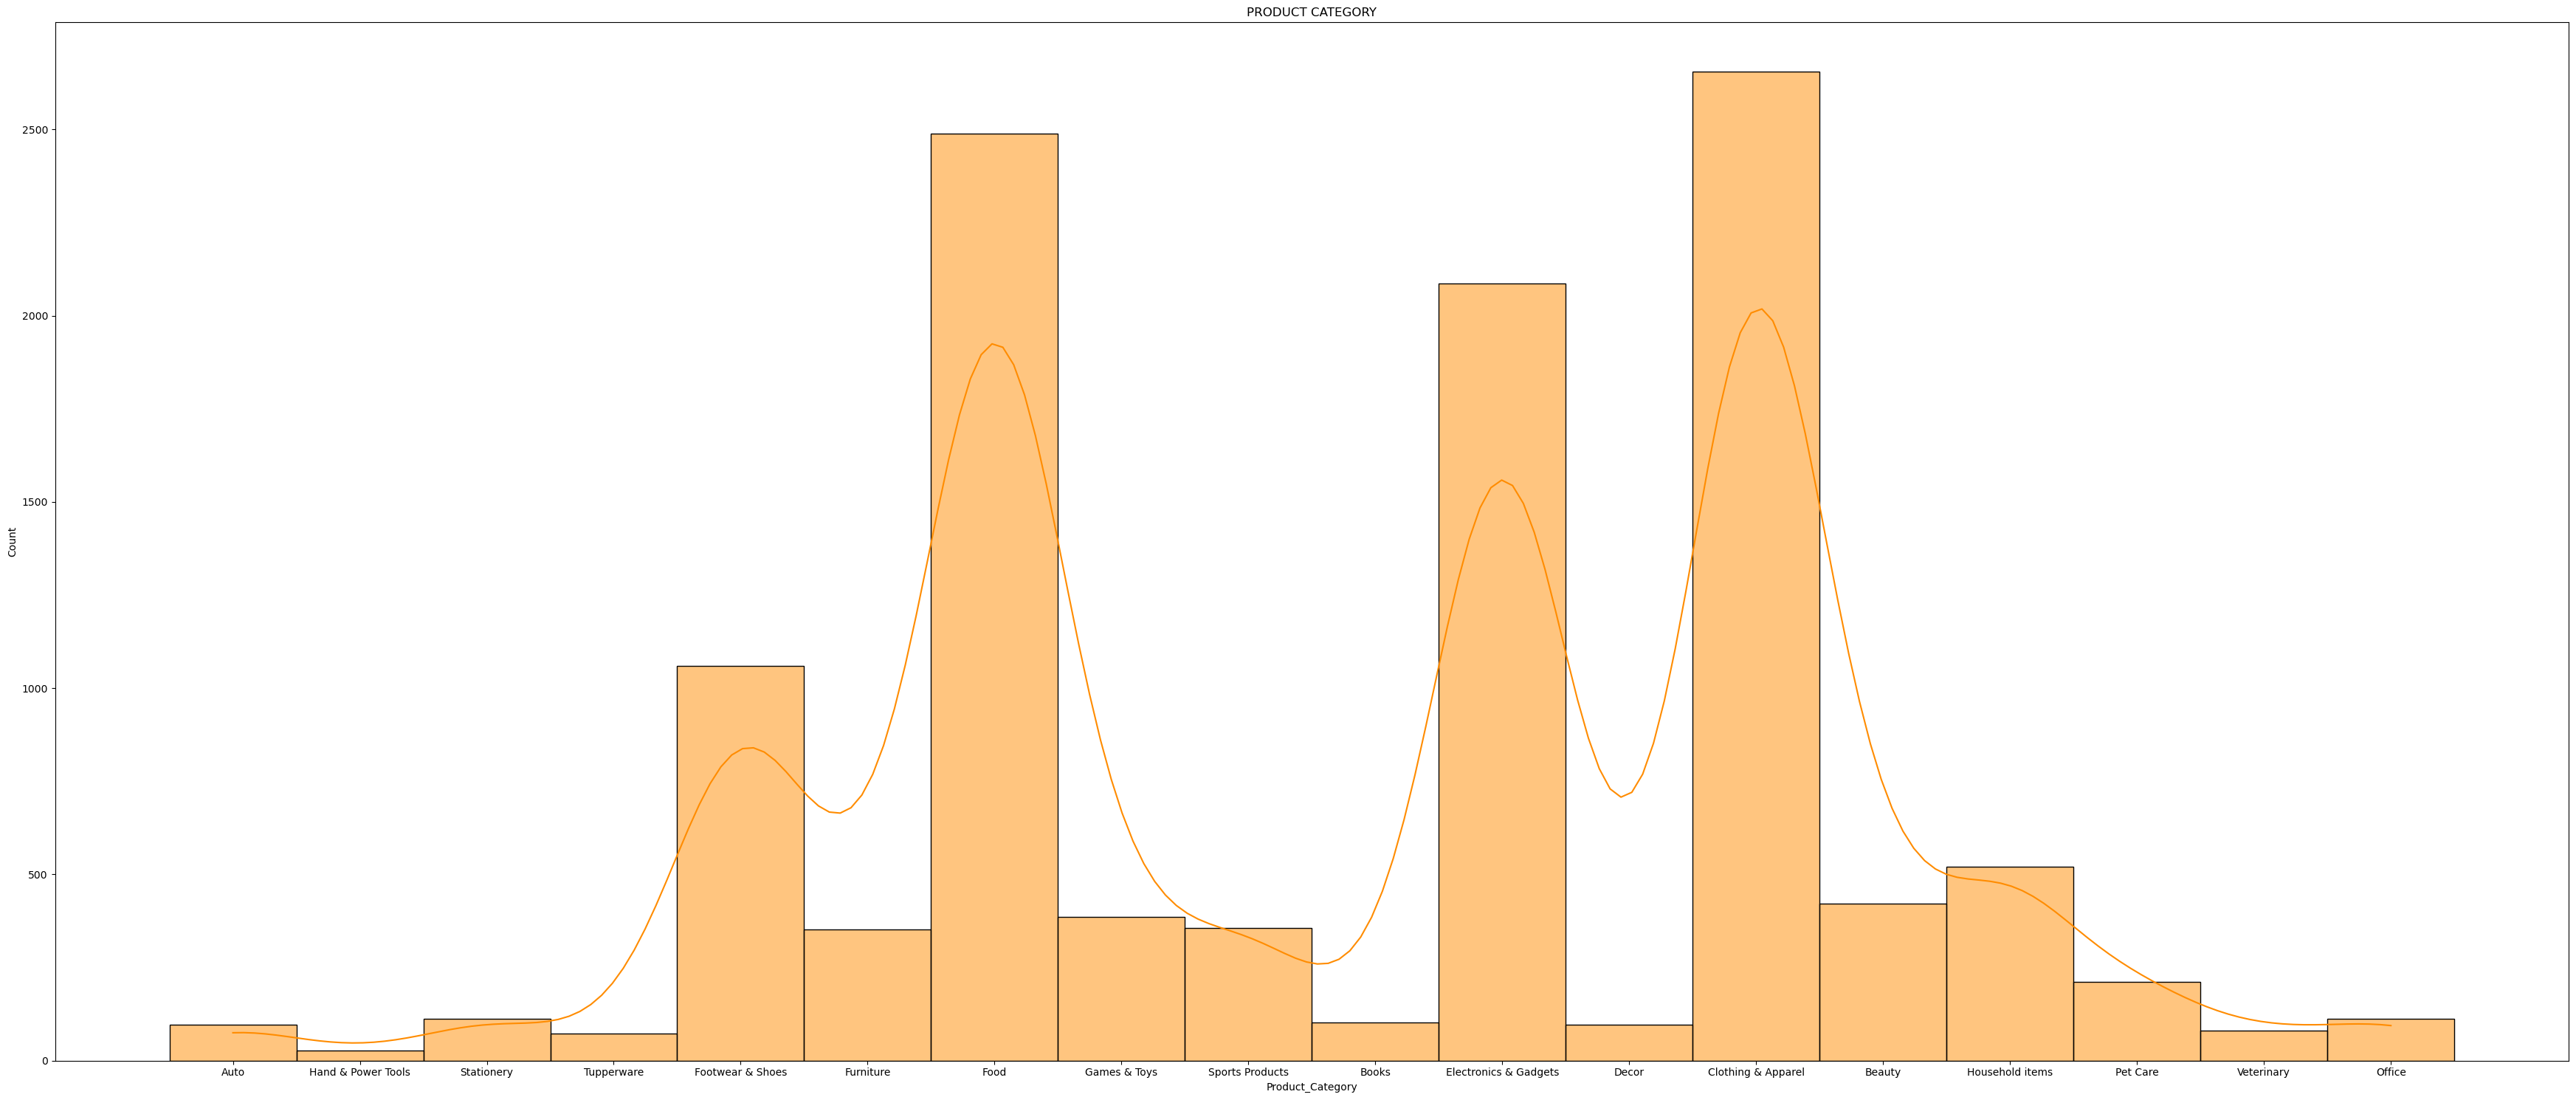

MOST BUYERS ARE FROM CLOTHING & APPAREL


In [176]:
plt.figure(figsize=(35,15))
sns.histplot(ds['Product_Category'],bins=15,kde=True,color='darkorange')
plt.title('PRODUCT CATEGORY')
plt.tight_layout()
plt.show()
print('MOST BUYERS ARE FROM CLOTHING & APPAREL')

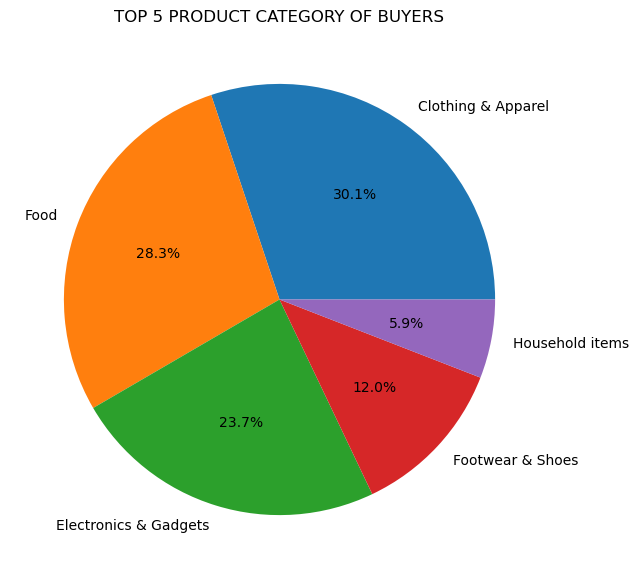

In [276]:
plt.figure(figsize=(7,7))
plt.pie(list(ds['Product_Category'].value_counts()[0:5]),labels=list(ds['Product_Category'].value_counts().keys()[0:5]),autopct='%1.1f%%')
plt.title('TOP 5 PRODUCT CATEGORY OF BUYERS')
plt.show()

<Figure size 1000x1000 with 0 Axes>

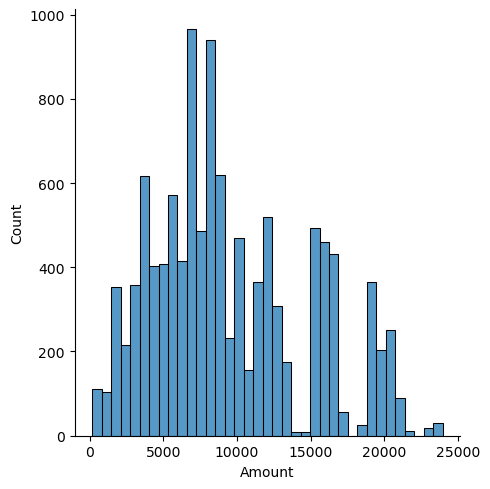

In [96]:
plt.figure(figsize=(10,10))
sns.displot(ds['Amount'])

In [105]:
ds['Orders'].value_counts()

2    2893
1    2808
4    2773
3    2765
Name: Orders, dtype: int64

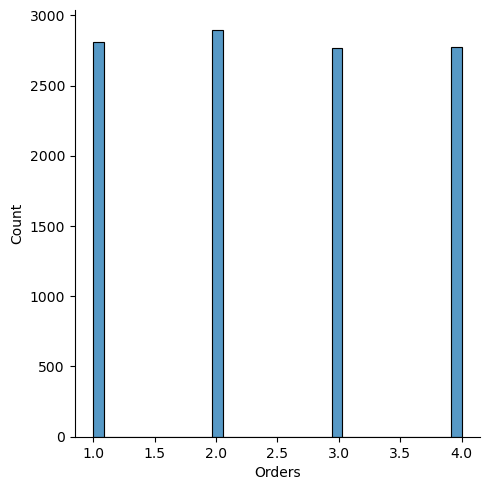

MOSTLY BUYERS ORDERS 2  PRODUCTS


In [281]:
ax=sns.displot(ds['Orders'])
plt.show()
print('MOSTLY BUYERS ORDERS 2  PRODUCTS')

In [282]:
#total orders
print('Total Products sold is :',np.sum(ds['Orders']))

Total Products sold is : 27981


In [164]:
ds.groupby('State')['Amount'].sum()

State
Andhra Pradesh       8037146.99
Bihar                4022757.00
Delhi               11603819.45
Gujarat              3946082.00
Haryana              4220175.00
Himachal Pradesh     4963368.00
Jharkhand            3026456.00
Karnataka           13523540.00
Kerala               3894491.99
Madhya Pradesh       8101142.00
Maharashtra         14427543.00
Punjab               1525800.00
Rajasthan            1909409.00
Telangana            1151490.00
Uttar Pradesh       19374968.00
Uttarakhand          2520944.00
Name: Amount, dtype: float64

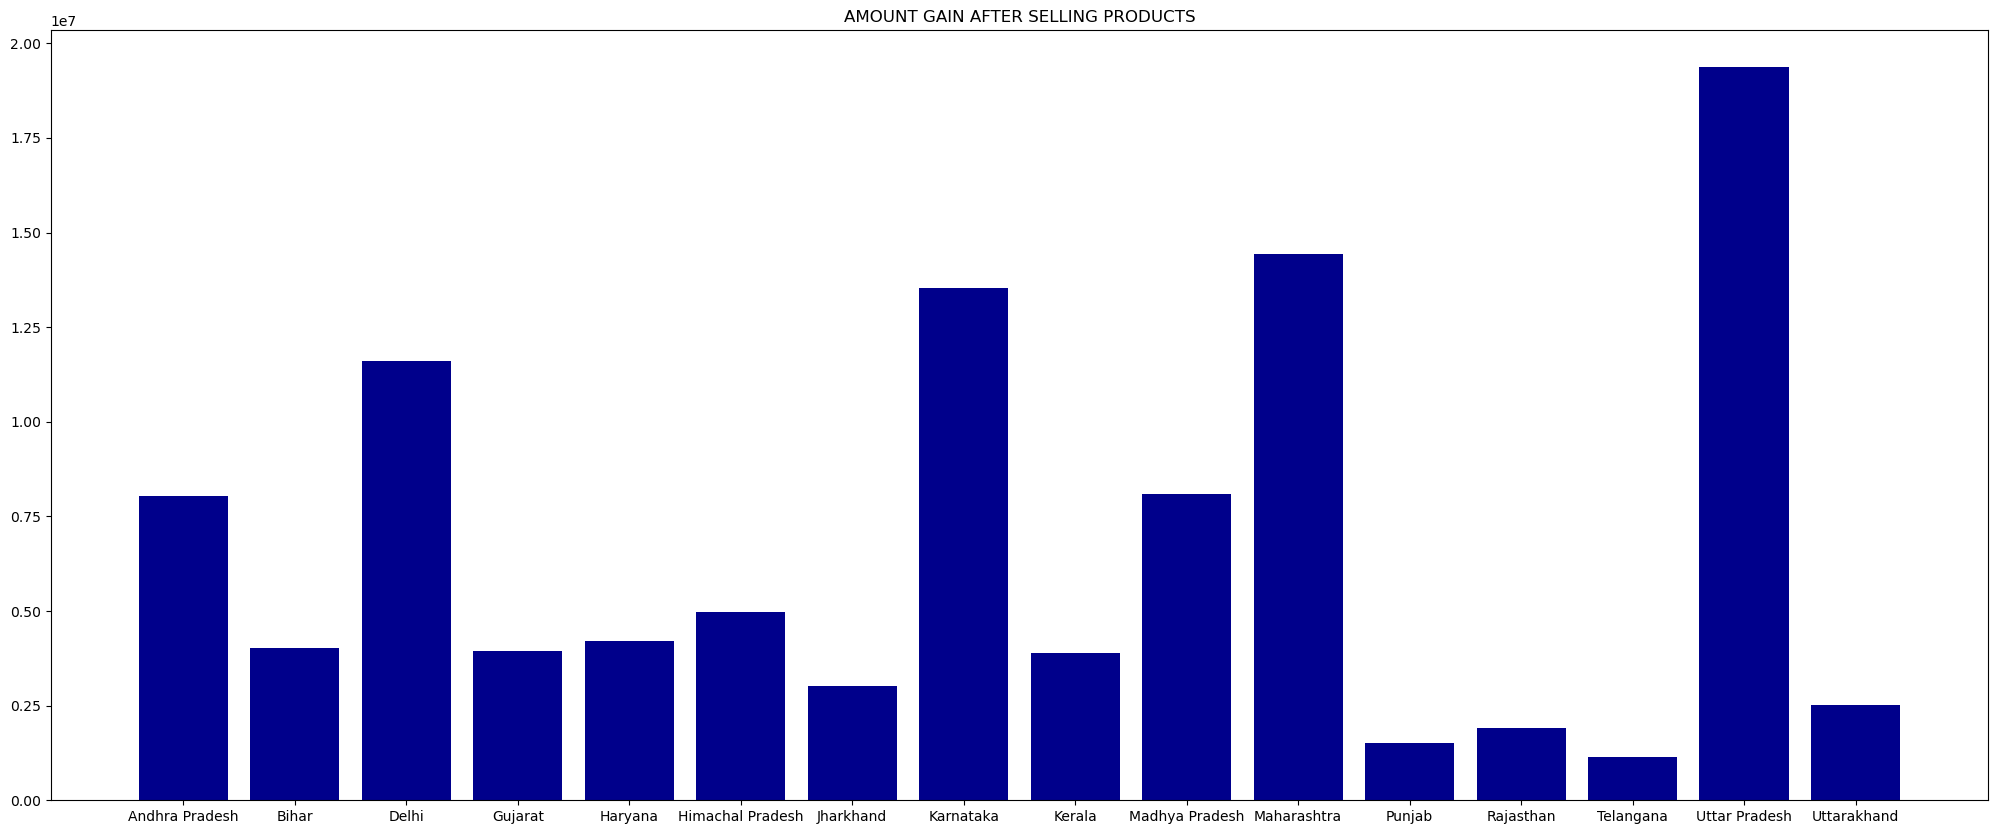

MOST AMOUNT CAME FROM UTTAR PRADESH


In [279]:
Most_amount = ds.groupby('State')['Amount'].sum().reset_index()
plt.figure(figsize=(25,10))
plt.bar(Most_amount['State'],Most_amount['Amount'],color='darkblue')
plt.title('AMOUNT GAIN AFTER SELLING PRODUCTS')
plt.show()
print("MOST AMOUNT CAME FROM UTTAR PRADESH")

In [280]:
#Total amount came from  selling of products
print('Total Amount is :',np.sum(ds['Amount']))

Total Amount is : 106249132.43


# TRAINING AND TESTING DATASET

In [188]:
ds.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [189]:
ds['Gender']=pd.Categorical(ds['Gender'])

In [228]:
x=ds[['Gender','Age','Marital_Status','State','Zone','Occupation','Product_Category']]
y=ds['Amount']

In [229]:
x.shape

(11239, 7)

In [230]:
y.shape

(11239,)

In [231]:
y

0        23952.0
1        23934.0
2        23924.0
3        23912.0
4        23877.0
          ...   
11246      370.0
11247      367.0
11248      213.0
11249      206.0
11250      188.0
Name: Amount, Length: 11239, dtype: float64

In [232]:
x

,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category
0,F,28,0,Maharashtra,Western,Healthcare,Auto
1,F,35,1,Andhra Pradesh,Southern,Govt,Auto
2,F,35,1,Uttar Pradesh,Central,Automobile,Auto
3,M,16,0,Karnataka,Southern,Construction,Auto
4,M,28,1,Gujarat,Western,Food Processing,Auto
...,...,...,...,...,...,...,...
11246,M,19,1,Maharashtra,Western,Chemical,Office
11247,M,33,0,Haryana,Northern,Healthcare,Veterinary
11248,F,40,0,Madhya Pradesh,Central,Textile,Office
11249,M,37,0,Karnataka,Southern,Agriculture,Office


# TRAIN TEST SPLIT

In [248]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [249]:
x_train.shape,x_test.shape

((8991, 7), (2248, 7))

In [250]:
y_train.shape,y_test.shape

((8991,), (2248,))

In [251]:
x=x.apply(pd.to_numeric,errors='coerce')
y=y.apply(pd.to_numeric,errors='coerce')

In [252]:
x.fillna(0,inplace=True)
y.fillna(0,inplace=True)

# LINEAR REGRESSION

In [253]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [254]:
model.fit(x_train,y_train)

LinearRegression()

In [255]:
model.intercept_

9048.733343564507

In [256]:
model.coef_

array([   0.        ,   11.81911771, -115.46387459,    0.        ,
          0.        ,    0.        ,    0.        ])

In [259]:
predictions=model.predict(x_test)
predictions

array([9299.66211785, 9474.22158097, 9441.49153032, ..., 9580.59364032,
       9169.65182309, 9287.84300014])